# FEDI CHESS RANKING ANALYSIS

## 1.Introduction:

 #### Chess FIDE is the international governing body for chess. It oversees and organizes official chess competitions worldwide. Here are some key aspects about FIDE:
 #### 1.Elo Rating
 #### 2.Top Players
 #### 3.World Chess Champion
 #### 4.Women’s Chess
 #### 5.Junior Talent

## 2.Domain/Topic knowledge

##### Chess, as we know it today, was born out of the Indian game chaturanga before the 600s AD. The game spread throughout Asia and Europe over the coming centuries, and eventually evolved into what we know as chess around the 16th century.
##### A chess rating system is a system used in chess to estimate the strength of a player, based on their performance versus other players. They are used by organizations such as FIDE

## 3.Why you choose this dataset?

#### I chose FIDE chess rankings dataset because of the respect I have for this game and the history that goes back to centuries.
#### Another reason is that this dataset is updated thoroughly.
#### This dataset from Kaggle contains 200 rows and 7 columns.
#### This dataset is very easy to demonstrate the EDA topics we’ve learnt during the course of EDA 351.

## 4.Importing libaries

### I used the libraries like: Pandas, Numpy, Matplotlib, Seaborn.
#### 1.Pandas: It is a powerful library for data manipulation and analysis.
#### 2.NumPy:  It is Essential for numerical computations and handling arrays and also provides mathematical functions and tools for working with large datasets.
#### 3.Matplotlib: A versatile plotting library that enables you to create various types of visualizations, such as line plots, scatter plots, histograms, and more.
#### 4.Seaborn: Built on top of Matplotlib, Seaborn simplifies statistical data visualization.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,expon,gamma,poisson

## Reading CSV file

In [226]:
df=pd.read_csv("/content/CHESSFIDE1.csv")

In [227]:
df.head() #read first 5 rows

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,1,YES,33
1,2,Liren Ding,2806,GM,China,1630,1992,2,YES,31
2,3,Alireza Firouzja,2793,GM,France,845,2003,3,YES,20
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,4,YES,31
4,5,Levon Aronian,2775,GM,United States,3320,1982,5,YES,41


<Figure size 1200x800 with 0 Axes>

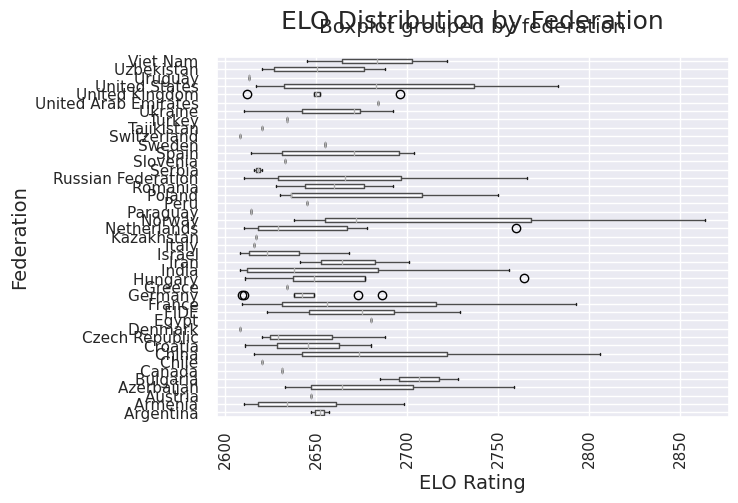

In [228]:
# @title ELO by Federation

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df.boxplot(column='ELO', by='federation', vert=False)
plt.xlabel('ELO Rating')
plt.ylabel('Federation')
plt.title('ELO Distribution by Federation')
_ = plt.xticks(rotation=90)

## 5.Data Describe

#### Column 1 - rank: A numerical ranking of the players.
#### Column 2 - name: The name of the chess player.
#### Column 3 - ELO: The player's Elo rating, a measure of their chess skill.
#### Column 4 - title: The player's chess title, which is "GM" (Grandmaster) in all three cases.
#### Column 5 - federation: The country or federation that the player represents.
#### Column 6 - games: The number of games played by the player.
#### Column 7 - birth_year: The birth year of the player.
#### Column 8 - ACTIVE: Indicates whether the player is currently active in chess ("YES" for all three).
#### Column 9 - age: The current age of the player.

In [229]:
# last 5 rows
df.tail()

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age
195,196,Boris Alterman,2608,GM,Israel,697,1970,196,NaN,53
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999,197,NaN,24
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004,198,NaN,19
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983,199,NO,40
199,200,Vadim Milov,2608,GM,Switzerland,1583,1972,200,NO,51


In [230]:
# Generate summary statistics for numerical columns
df.describe()

,rank,ELO,games,birth_year,INTRANK,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000,100.500000,33.605000
std,57.879185,47.208793,776.177129,9.057548,57.879185,9.057548
min,1.000000,2608.000000,277.000000,1965.000000,1.000000,17.000000
25%,50.750000,2623.750000,785.000000,1984.000000,50.750000,27.000000
50%,100.500000,2650.500000,1211.000000,1990.000000,100.500000,33.000000
75%,150.250000,2686.000000,1784.000000,1996.000000,150.250000,39.000000
max,200.000000,2864.000000,3913.000000,2006.000000,200.000000,58.000000


In [231]:
# Display basic information about the DataFrame , including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        200 non-null    int64 
 1   name        200 non-null    object
 2   ELO         200 non-null    int64 
 3   title       200 non-null    object
 4   federation  200 non-null    object
 5   games       200 non-null    int64 
 6   birth_year  200 non-null    int64 
 7   INTRANK     200 non-null    int64 
 8   ACTIVE      17 non-null     object
 9   age         200 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


In [232]:
# Count the number of unique values in each column
df.nunique()

,0
rank,200
name,200
ELO,101
title,1
federation,43
games,191
birth_year,40
INTRANK,200
ACTIVE,2
age,40


In [233]:
#Col null values
df.isnull().sum()

,0
rank,0
name,0
ELO,0
title,0
federation,0
games,0
birth_year,0
INTRANK,0
ACTIVE,183
age,0


## 6.Data Cleaning

#### In data cleaning, it will examining the information for errors, lacking values, and inconsistencies and also includes techniques including records imputation, managing missing statistics, and figuring out and getting rid of outliers.


In [234]:
# Fill null values with 0
clean =  df.fillna(0)
clean[df.isnull().any(axis=1)]

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age
15,16,Sergey Karjakin,2747,GM,Russian Federation,2932,1990,16,0,33
16,17,Alexander Grischuk,2745,GM,Russian Federation,3235,1983,17,0,40
17,18,Teimour Radjabov,2738,GM,Azerbaijan,1996,1987,18,0,36
18,19,Hao Wang,2735,GM,China,1723,1989,19,0,34
19,20,Dmitry Andreikin,2729,GM,FIDE,1567,1990,20,0,33
...,...,...,...,...,...,...,...,...,...,...
193,194,David Baramidze,2609,GM,Germany,1123,1988,194,0,35
194,195,Christian Bauer,2609,GM,France,2092,1977,195,0,46
195,196,Boris Alterman,2608,GM,Israel,697,1970,196,0,53
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999,197,0,24


In [235]:
import pandas as pd
# Load the original CSV file into a DataFrame
input_file_path = 'CHESSFIDE1.csv'
df = pd.read_csv(input_file_path)

# Specify the columns you want to keep in the new CSV file
selected_columns = ['rank ','name ','ELO','title','federation','games','birth_year','INTRANK','ACTIVE','age']

# Create a new DataFrame with only the selected columns
cleaned_df = df[selected_columns]

# Save the new DataFrame to a new CSV file
output_file_path = 'cleaneddata.csv'
cleaned_df.to_csv(output_file_path, index=False)

print(f"New CSV file '{output_file_path}' created with selected columns.")


New CSV file 'cleaneddata.csv' created with selected columns.


In [236]:
# Select specific columns ('title', 'director', 'release_year', 'runtime', 'genre', 'rating', 'gross(M)')
# from the 'clean' DataFrame and export them to a CSV file named 'cleaneddata.csv'.
# Setting index=False ensures that the CSV file does not include the index column.
columns=['rank ','name ','ELO','title','federation','games','birth_year','INTRANK','ACTIVE','age']
clean[columns].to_csv('./cleaneddata.csv',index=False)

In [237]:
# Read data from the 'cleaneddata.csv' CSV file into a new DataFrame called 'cleandf'.
# Then, display the first five rows of the DataFrame using the 'head()' method.
cleandf=pd.read_csv('./cleaneddata.csv')
cleandf.head()

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,1,YES,33
1,2,Liren Ding,2806,GM,China,1630,1992,2,YES,31
2,3,Alireza Firouzja,2793,GM,France,845,2003,3,YES,20
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,4,YES,31
4,5,Levon Aronian,2775,GM,United States,3320,1982,5,YES,41


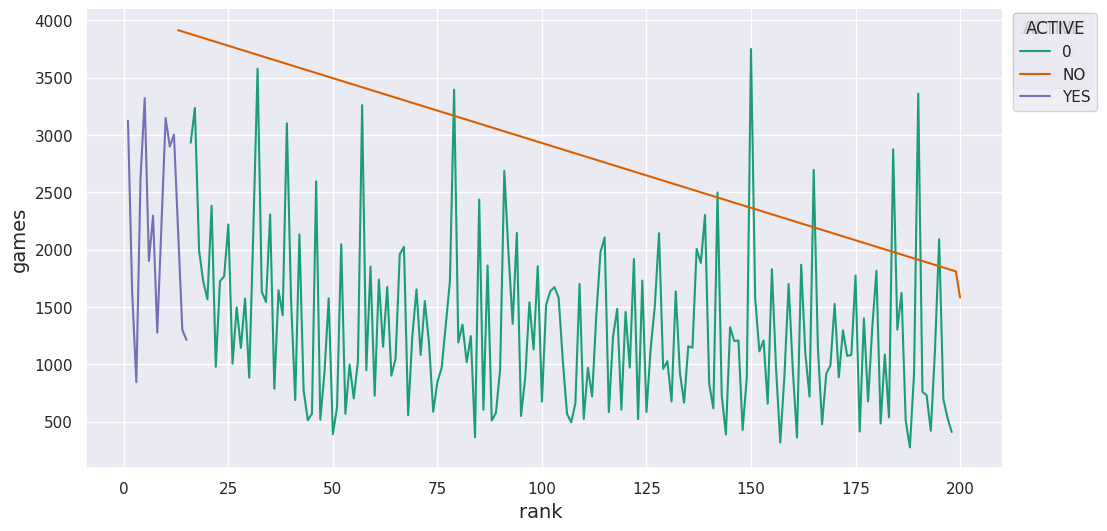

In [238]:
# @title rank  vs games

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rank ']
  ys = series['games']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cleandf.sort_values('rank ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ACTIVE')):
  _plot_series(series, series_name, i)
  fig.legend(title='ACTIVE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rank ')
_ = plt.ylabel('games')

In [239]:
# Detect and mark duplicate rows in the DataFrame 'cleandf'
cleandf.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [240]:
# Filter and display rows with at least one null value
cleandf[cleandf.isnull().any(axis=1)]

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age


In [241]:
import pandas as pd
# Assuming 'df' is your DataFrame and 'column_to_remove' is the column you want to delete
column_to_remove = 'INTRANK'

# Use the drop() method to remove the specified column
df.drop(column_to_remove, axis=1, inplace=True)

# 'axis=1' specifies that you are removing a column, and 'inplace=True' applies the change to the DataFrame directly

In [242]:
# read first 5 rows
df.head()

,rank,name,ELO,title,federation,games,birth_year,ACTIVE,age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,YES,33
1,2,Liren Ding,2806,GM,China,1630,1992,YES,31
2,3,Alireza Firouzja,2793,GM,France,845,2003,YES,20
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,YES,31
4,5,Levon Aronian,2775,GM,United States,3320,1982,YES,41


In [243]:
#Check the data information using
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        200 non-null    int64 
 1   name        200 non-null    object
 2   ELO         200 non-null    int64 
 3   title       200 non-null    object
 4   federation  200 non-null    object
 5   games       200 non-null    int64 
 6   birth_year  200 non-null    int64 
 7   INTRANK     200 non-null    int64 
 8   ACTIVE      200 non-null    object
 9   age         200 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


In [244]:
# see the descriptive structure of the data
cleandf.describe()

,rank,ELO,games,birth_year,INTRANK,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000,100.500000,33.605000
std,57.879185,47.208793,776.177129,9.057548,57.879185,9.057548
min,1.000000,2608.000000,277.000000,1965.000000,1.000000,17.000000
25%,50.750000,2623.750000,785.000000,1984.000000,50.750000,27.000000
50%,100.500000,2650.500000,1211.000000,1990.000000,100.500000,33.000000
75%,150.250000,2686.000000,1784.000000,1996.000000,150.250000,39.000000
max,200.000000,2864.000000,3913.000000,2006.000000,200.000000,58.000000


##### Check the categorical and numerical columns:

In [245]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['name ', 'title', 'federation', 'ACTIVE']
Numerical columns : ['rank ', 'ELO', 'games', 'birth_year', 'age']


In [246]:
# method used to fill missing values
cleandf.fillna('Not Determined')

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,1,YES,33
1,2,Liren Ding,2806,GM,China,1630,1992,2,YES,31
2,3,Alireza Firouzja,2793,GM,France,845,2003,3,YES,20
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,4,YES,31
4,5,Levon Aronian,2775,GM,United States,3320,1982,5,YES,41
...,...,...,...,...,...,...,...,...,...,...
195,196,Boris Alterman,2608,GM,Israel,697,1970,196,0,53
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999,197,0,24
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004,198,0,19
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983,199,NO,40


In [247]:
# Filter and display rows with at least one null value
cleandf[cleandf.isnull().any(axis=1)]

,rank,name,ELO,title,federation,games,birth_year,INTRANK,ACTIVE,age


## 7.Outlier Analysis

#### Outlier analysis is the process of identifying anomalous observations in a dataset. Outliers are data points that significantly deviate from the general pattern or distribution of the dataset.

In [248]:
# Define a function to find outliers in a dataset using the IQR method
def find_outliers_iqr(data=df):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean mask indicating which data points are outliers
    return (data < lower_bound) | (data > upper_bound)
outliers = df[['age']].apply(find_outliers_iqr)

# Display rows containing potential outliers
potential_outliers = df[outliers.any(axis=1)]
print("Rows with Potential Outliers:")
potential_outliers

Rows with Potential Outliers:


,rank,name,ELO,title,federation,games,birth_year,ACTIVE,age
176,177,Miguel Illescas Cordoba,2614,GM,Spain,1402,1965,NaN,58
183,184,Nigel D Short,2612,GM,United Kingdom,2875,1965,NaN,58


## Box Plot

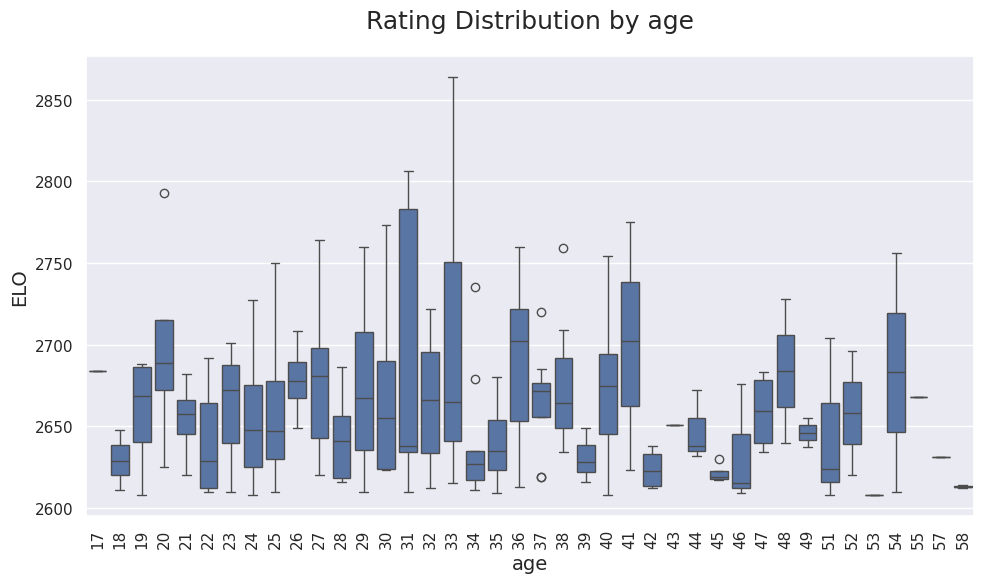

In [249]:
# Create a figure with a specified size (10x6 inches)
plt.figure(figsize=(10, 6))

# Create a boxplot with 'genre' on the x-axis and 'rating' on the y-axis, using data from 'cleandf'
sns.boxplot(x='age', y='ELO', data=df)

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=90)

# Set a label for the x-axis
plt.xlabel('age')

# Set a label for the y-axis
plt.ylabel('ELO')

# Set a title for the plot
plt.title('Rating Distribution by age')

# Ensure a tight layout for better presentation
plt.tight_layout()

# Display the plot
plt.show()

## 8.Data Visualisation:

#### Data visualization is the graphical representation of information and data. It involves using visual elements such as charts, graphs, and maps to convey complex data relationships and insights in a way that is easy to understand.

## 9.Univariate Analysis

### 9.1 Histogram

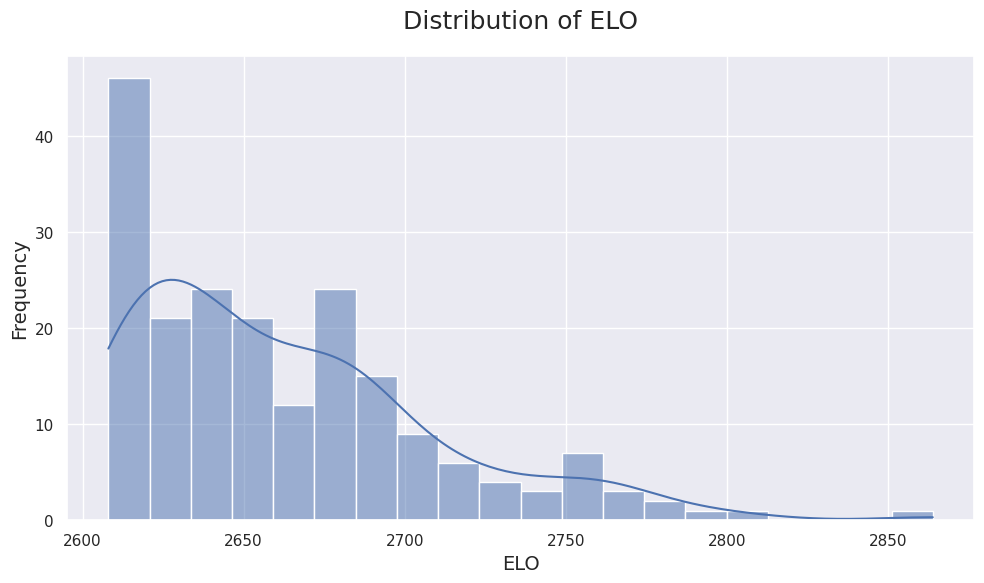

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ELO'], bins=20, kde=True)
plt.xlabel('ELO')
plt.ylabel('Frequency')
plt.title('Distribution of ELO')
plt.tight_layout()
plt.show()

### 9.2 Pie Chart

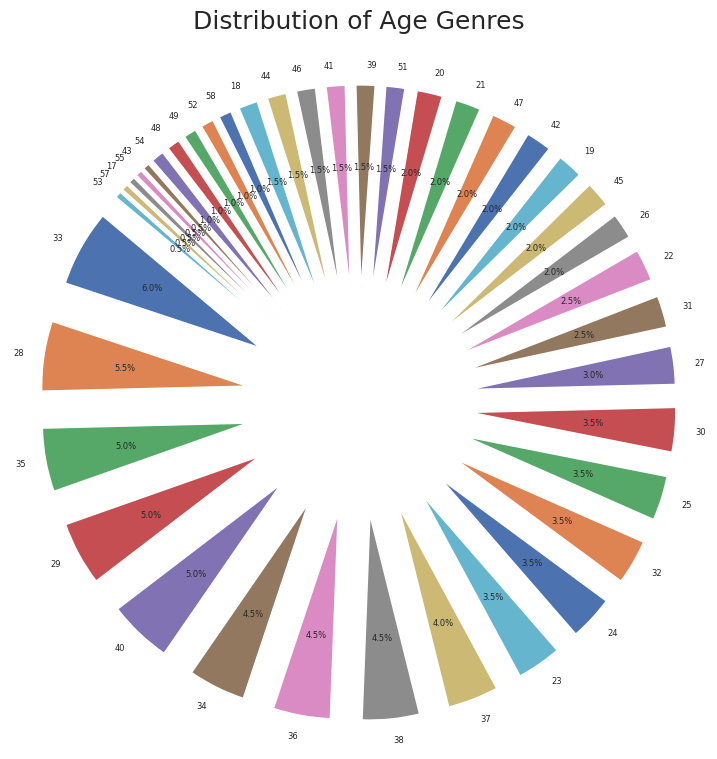

In [251]:
#pie chart to visualize the distribution of age genres
genre_counts = df['age'].value_counts()

explode = [0.55] * len(genre_counts)  # Adjust the values for more separation

plt.figure(figsize=(9, 9))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%.1f%%', startangle=140, explode=explode,
        textprops={'fontsize': 6})  # Adjust the fontsize as needed
plt.title('Distribution of Age Genres')
plt.axis('equal')
plt.show()

### 9.3 Distribution Plot

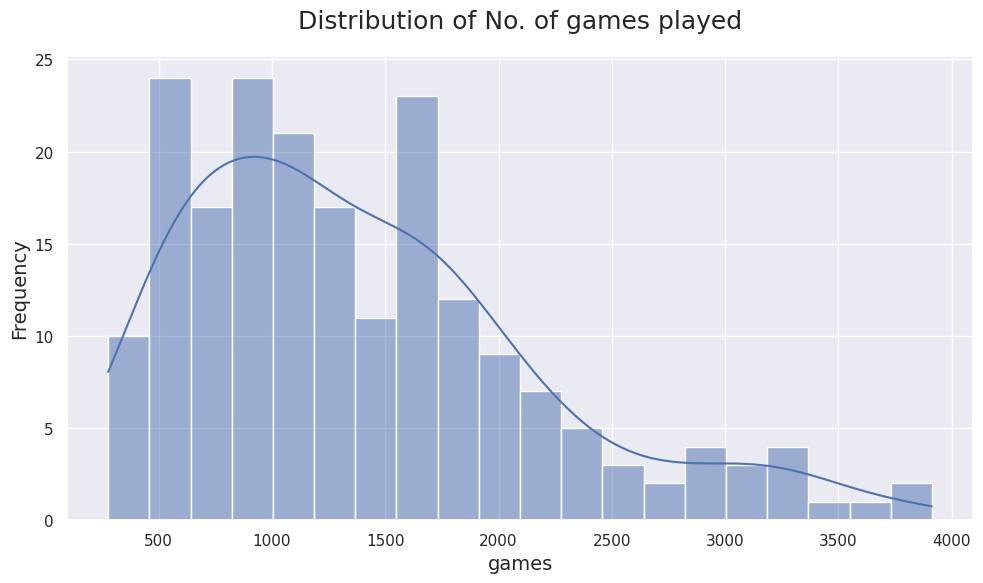

In [252]:
# Creating a distribution plot of gross(M) using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='games', bins=20, kde=True)
plt.xlabel('games')
plt.ylabel('Frequency')
plt.title('Distribution of No. of games played')
plt.tight_layout()
plt.show()

## 10 Bivariate Analysis

### 10.1 Bar Plot

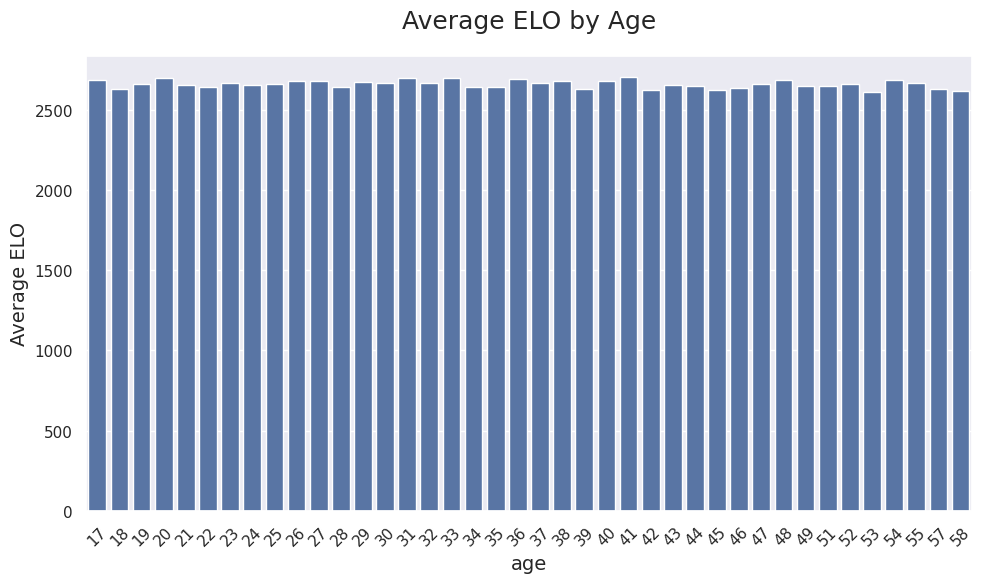

In [253]:
# Bar plot of average gross revenue by genre
avg_gross_by_genre = df.groupby('age')['ELO'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_genre.index, y=avg_gross_by_genre.values)
plt.xticks(rotation=45)
plt.xlabel('age')
plt.ylabel('Average ELO')
plt.title('Average ELO by Age')
plt.tight_layout()
plt.show()


### 10.2 Scatterplot

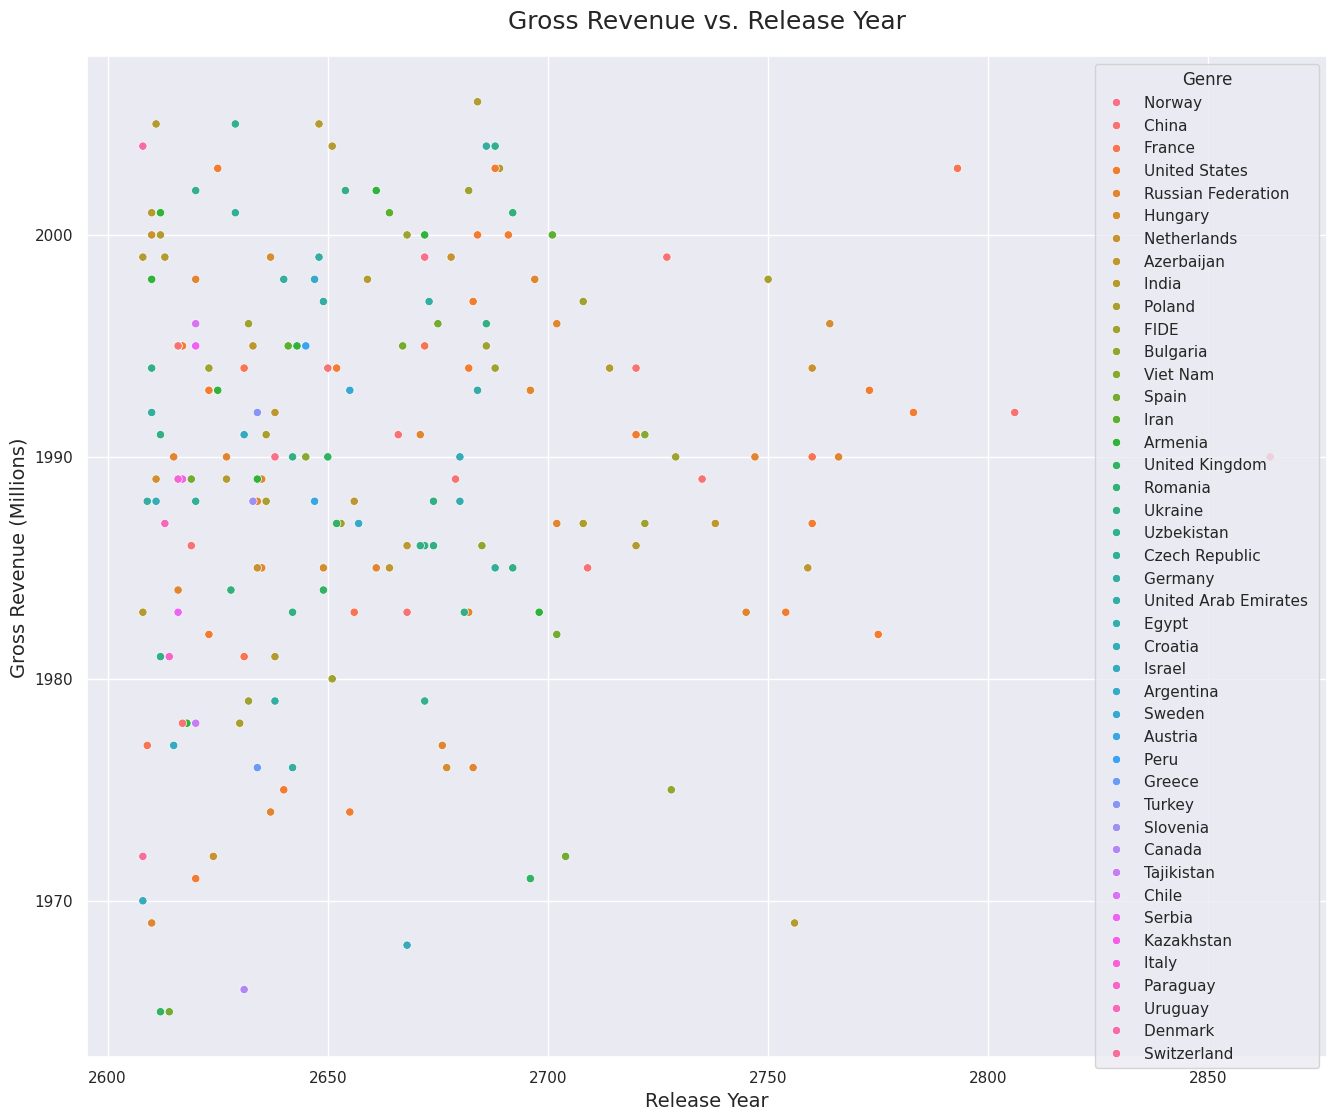

In [254]:
#scatterplot to explore the relationship between movie release years and gross revenues
plt.figure(figsize=(16, 13))
sns.scatterplot(x='ELO', y='birth_year', data=df, hue='federation')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue (Millions)')
plt.title('Gross Revenue vs. Release Year')
plt.legend(title='Genre')

plt.show()

### 10.3 Violin Plot

<ipython-input-255-bc8795325947>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age', y='games', data=df, palette='Set3')


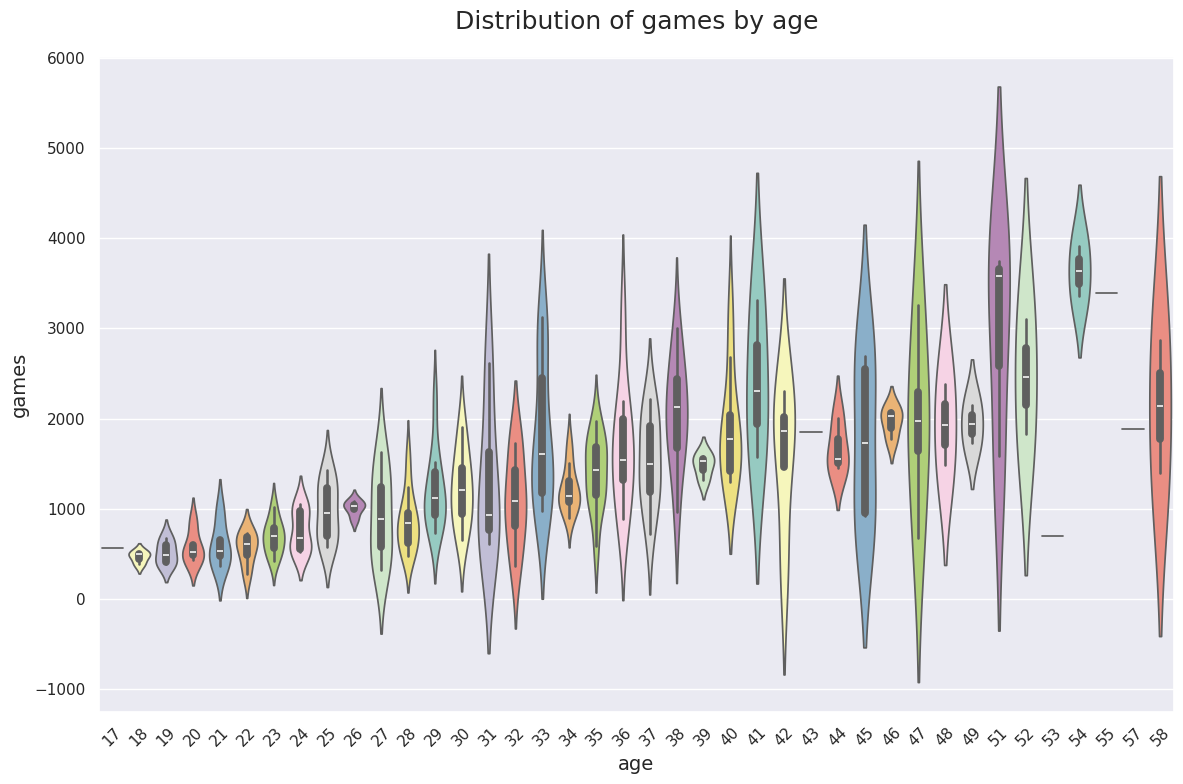

In [255]:
# Create a violin plot to visualize the distribution of gross earnings (in millions) across different movie ratings
plt.figure(figsize=(12, 8))
sns.violinplot(x='age', y='games', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('age')
plt.ylabel('games')
plt.title('Distribution of games by age')
plt.tight_layout()
plt.show()


## 11. Multivariate Analysis

### 11.1. Pair Plot

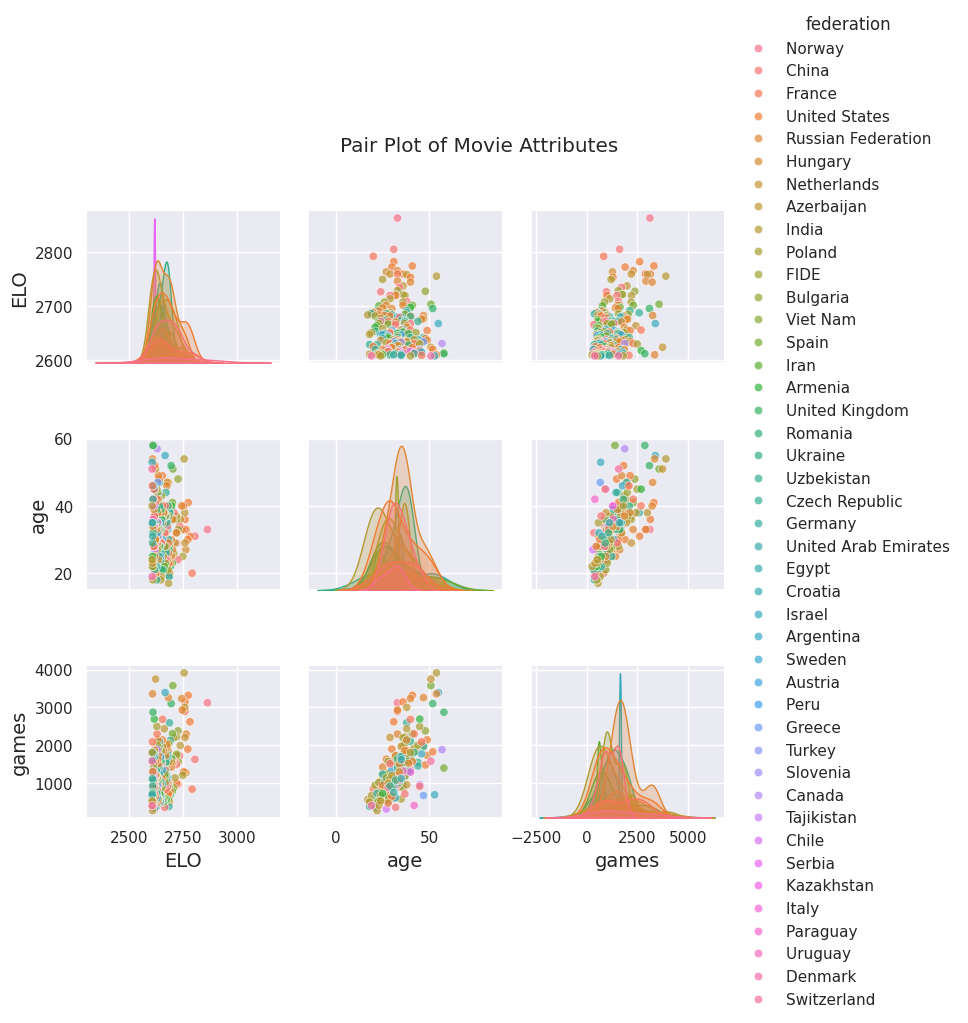

In [256]:
# Selecting the specified columns
subset_columns = ['title', 'ELO', 'age', 'federation', 'games']

# Filtering the DataFrame
subset_df = df[subset_columns]

# Setting Seaborn runtime configurations for more space
sns.set(rc={'axes.labelsize': 14, 'axes.titlesize': 18, 'axes.titlepad': 20})

# Creating a pair plot using Seaborn
plot = sns.pairplot(data=subset_df, hue='federation', plot_kws={'alpha': 0.7})

# Adjusting layout for more space between plot and axes titles
plot.fig.suptitle('Pair Plot of Movie Attributes', y=1.00)
plt.subplots_adjust(top=0.9, hspace=0.5)  # Increase the top margin and adjust vertical space
plt.show()

### 11.2. Heatmap

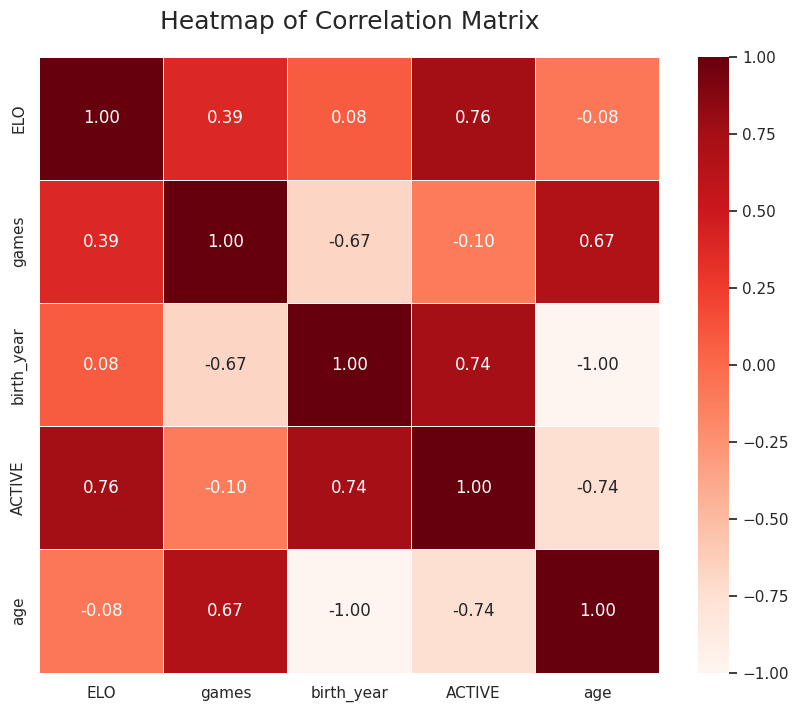

In [259]:
# Select the columns you want to include in the heatmap
selected_columns = [ 'ELO', 'games', 'birth_year', 'ACTIVE', 'age']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 12.Distributions

#### The distribution helps you identify patterns, outliers, and potential issues in the data. It also guides the selection of appropriate statistical tests and models for further analysis.

### 12.1 Poisson Distribution of Rating

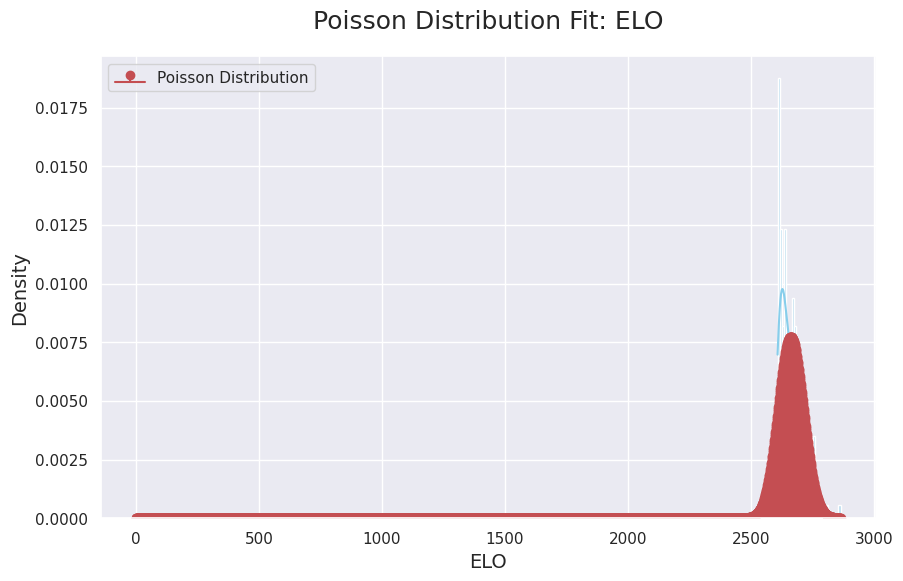

In [260]:
# Choose a column for the Poisson distribution (e.g., 'rating')
column_name = 'ELO'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'r-', label='Poisson Distribution')

plt.title(f'Poisson Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()


In [261]:
print(df.columns)

Index(['rank ', 'name ', 'ELO', 'title', 'federation', 'games', 'birth_year',
       'ACTIVE', 'age'],
      dtype='object')


### 12.2 Exponential Distribution of Rating

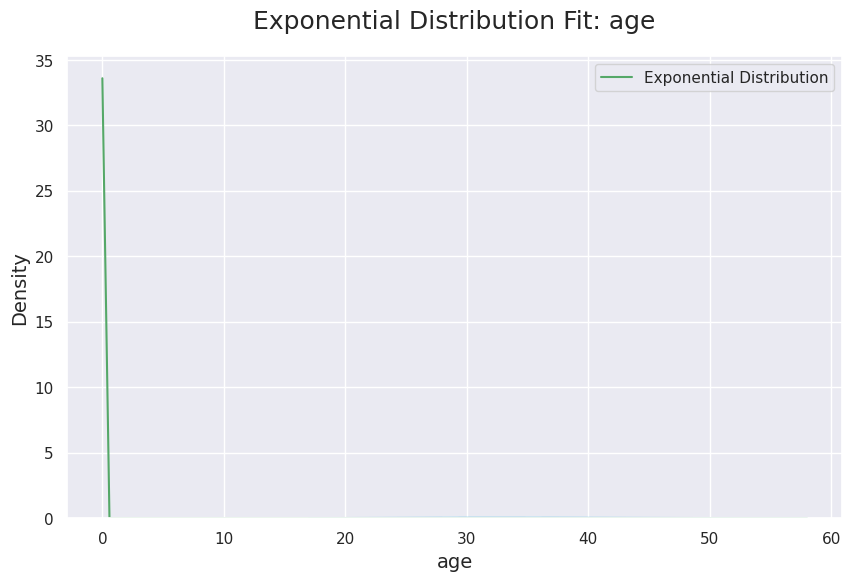

In [262]:
# Choose a column for the Exponential distribution (e.g., 'rating')
column_name = 'age'  # Replace 'rating' with your actual column name

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

plt.title(f'Exponential Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()


### 12.3 Gamma Distribution of Rating

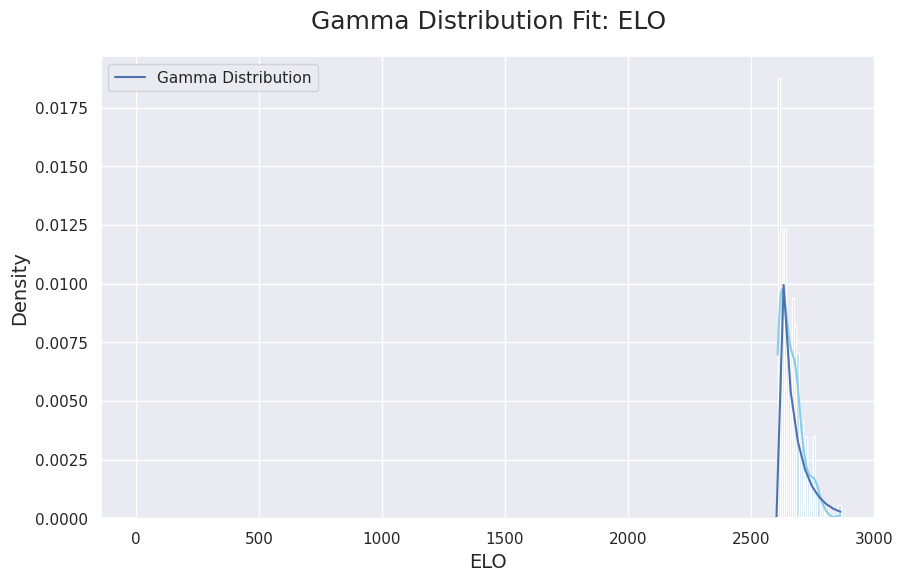

In [263]:
# Choose a column for the Gamma distribution (e.g., 'rating')
column_name = 'ELO'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

plt.title(f'Gamma Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()


### 12.4 Normal Distribution of Rating

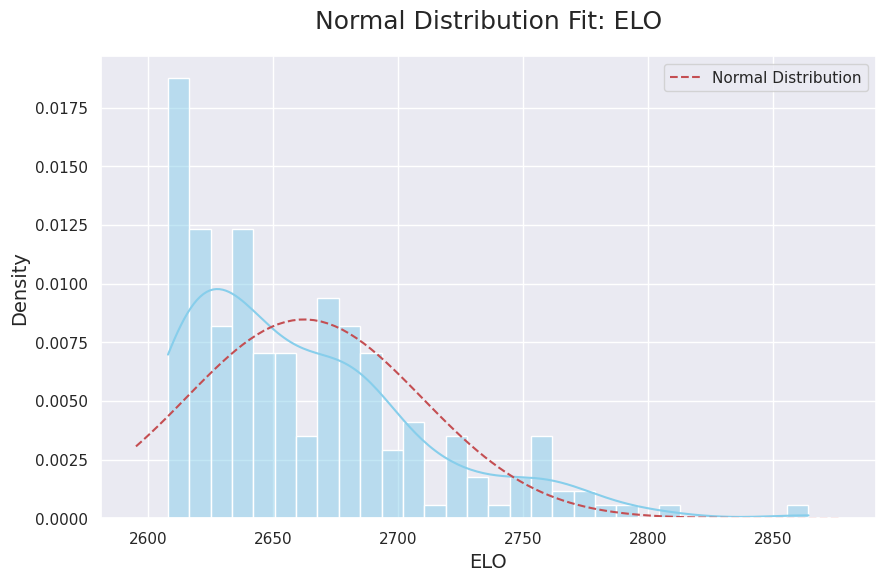

In [264]:
# Choose a column for the Normal distribution (e.g., 'rating')
column_name = 'ELO'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

plt.title(f'Normal Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

### 12.5 Combination of All Distributions of Rating

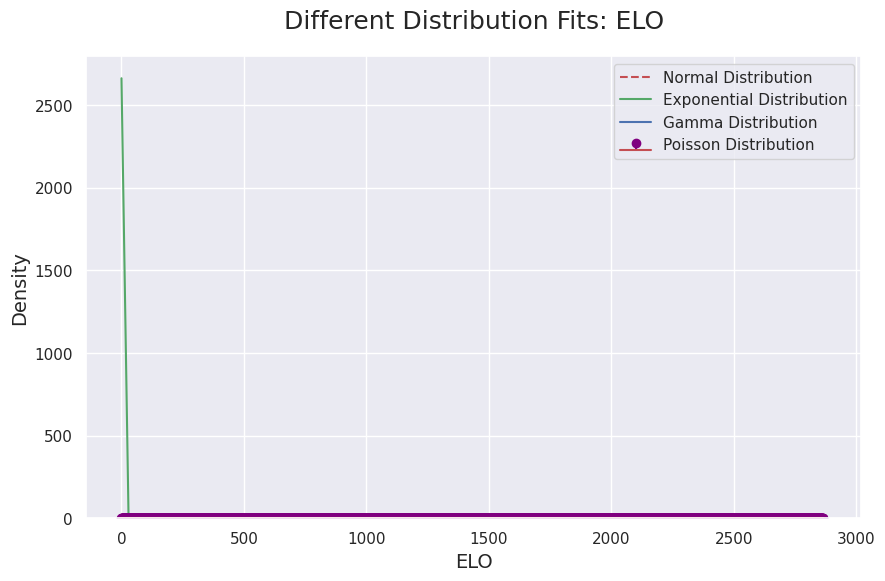

In [265]:
# Choose a column for the distribution fits (e.g., 'rating')
column_name = 'ELO'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'purple', label='Poisson Distribution')

plt.title(f'Different Distribution Fits: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

### 13.Hypothesis Testing of Rating

#### Hypothesis testing in the context of Exploratory Data Analysis (EDA) typically involves using statistical tests to make inferences about the characteristics of a population based on data.

In [266]:

from scipy.stats import ttest_ind

# Assuming you have a DataFrame named 'data' with the given columns
# Replace 'your_data.csv' with the actual path and name of your CSV file


# Select two birth years for comparison
birth_year1 = 1990
birth_year2 = 2000

# Filter data for the two birth years
group1_games = cleandf[cleandf['birth_year'] == birth_year1]['games']
group2_games = cleandf[cleandf['birth_year'] == birth_year2]['games']

# Perform an independent t-test
t_statistic, p_value = ttest_ind(group1_games, group2_games, equal_var=False)

# Display the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (commonly 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference in the number of games played between players born in {birth_year1} and {birth_year2}.")
else:
    print(f"Fail to reject the null hypothesis: There is no significant difference in the number of games played between players born in {birth_year1} and {birth_year2}.")


T-statistic: 4.664179309622362
P-value: 0.00042923574058235556
Reject the null hypothesis: There is a significant difference in the number of games played between players born in 1990 and 2000.


## Questions for data analysis

### Question 1: What is the average Elo rating in the dataset?


Average Elo rating: 2662.385


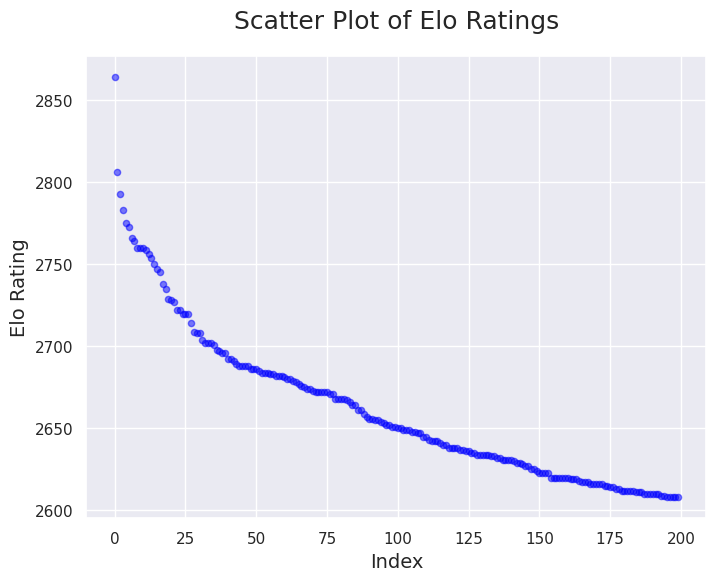

In [267]:
average_elo_rating = df['ELO'].mean()
print("Average Elo rating:", average_elo_rating)
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['ELO'], s=20, c='blue', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Elo Rating')
plt.title('Scatter Plot of Elo Ratings')
plt.grid(True)
plt.show()

### Question 2: Who has the highest Elo rating in the dataset, and what is their rating?


Player with the highest Elo rating: Magnus Carlsen 
Highest Elo rating: 2864


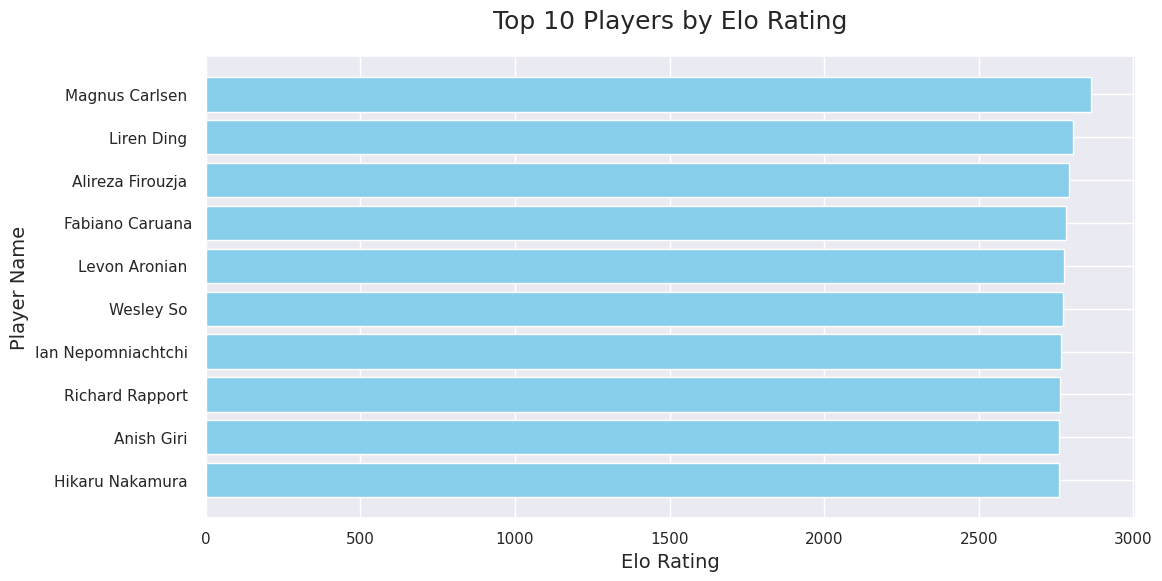

In [268]:
highest_rating_player = df[df['ELO'] == df['ELO'].max()]
highest_rating_name = highest_rating_player['name '].values[0]
highest_rating = highest_rating_player['ELO'].values[0]
print("Player with the highest Elo rating:", highest_rating_name)
print("Highest Elo rating:", highest_rating)

top_10_players = df.nlargest(10, 'ELO')
plt.figure(figsize=(12, 6))
plt.barh(top_10_players['name '], top_10_players['ELO'], color='skyblue')
plt.xlabel('Elo Rating')
plt.ylabel('Player Name')
plt.title('Top 10 Players by Elo Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest-rated player at the top
plt.show()

### Question 3: Which country has the most players in the top 200 rankings?


Country with the most players: Russian Federation 


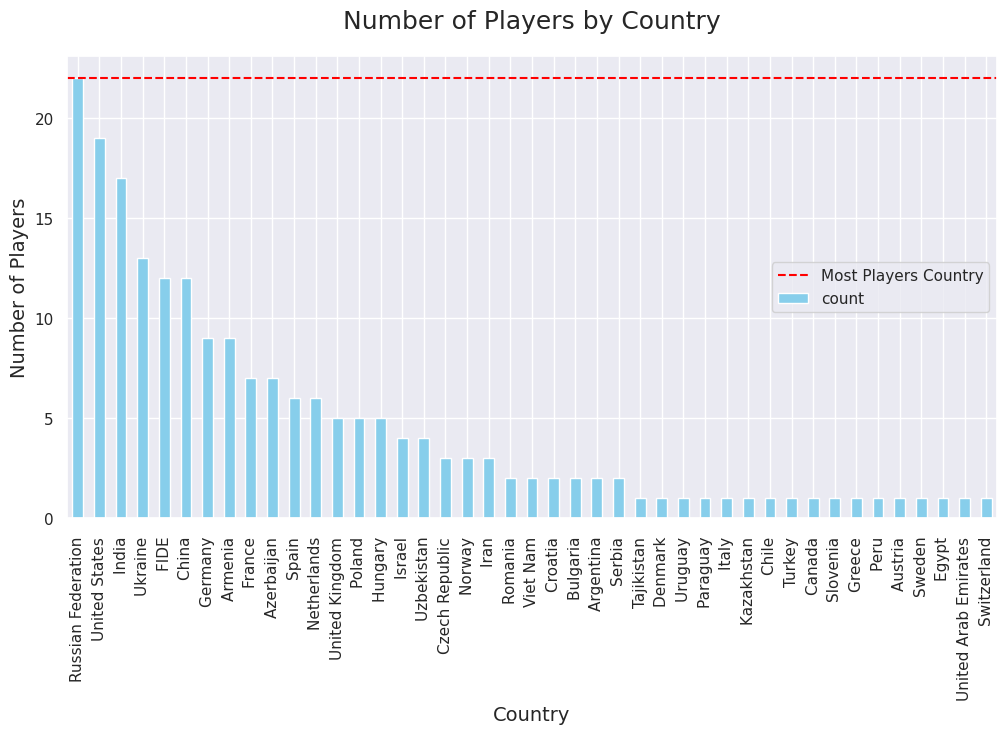

In [269]:
most_players_country = df['federation'].mode().values[0]
print("Country with the most players:", most_players_country)

country_counts = df['federation'].value_counts()
0000

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Number of Players by Country')
plt.xticks(rotation=90)
plt.axhline(country_counts[most_players_country], color='red', linestyle='--', label='Most Players Country')
plt.legend()
plt.show()

### Question 4: What is the average number of games played by the players in the dataset?


Average number of games played: 1394.185


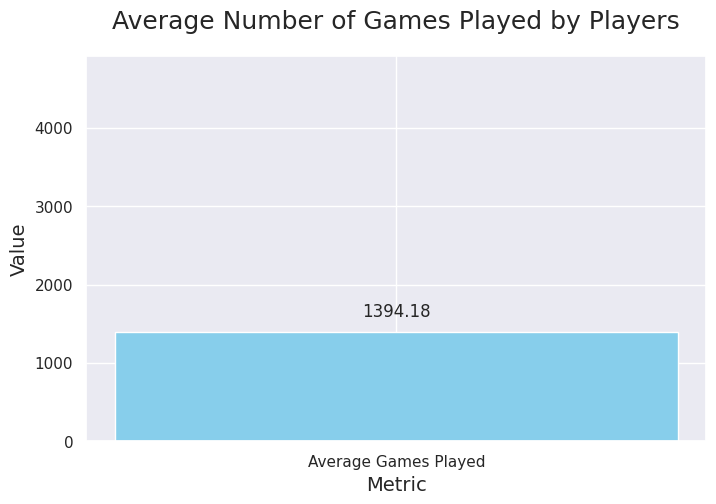

In [270]:
average_games_played = df['games'].mean()
print("Average number of games played:", average_games_played)

plt.figure(figsize=(8, 5))
plt.bar('Average Games Played', average_games_played, color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Average Number of Games Played by Players')
plt.ylim(0, df['games'].max() + 1000)  # Set the y-axis limit
plt.text(0, average_games_played + 200, f'{average_games_played:.2f}', ha='center', fontsize=12)
plt.show()

### Question 5: Who is the youngest player in the top 200 rankings?


Youngest player: Gukesh D 
Birth year: 2006


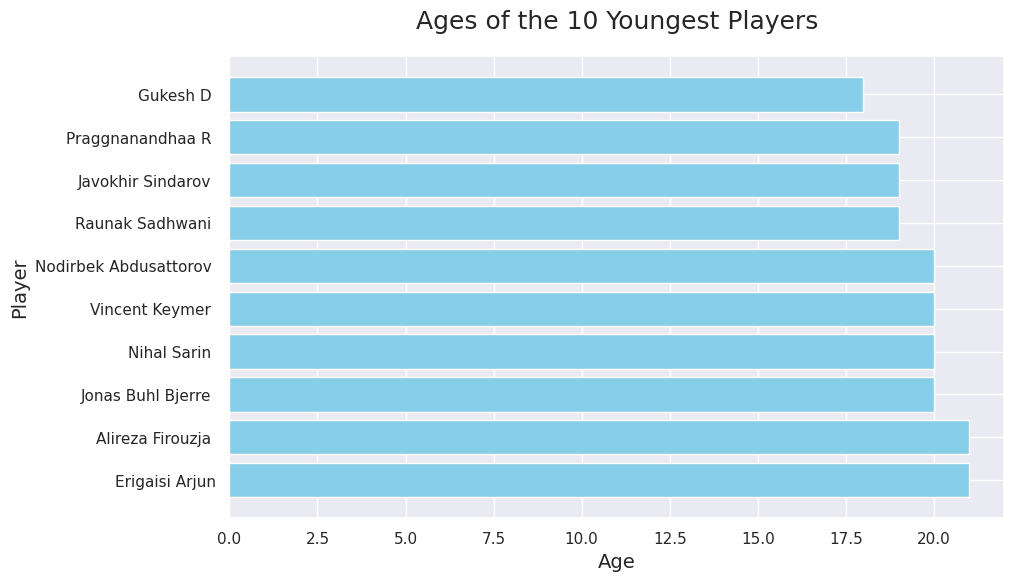

In [271]:
youngest_player = df[df['birth_year'] == df['birth_year'].max()]
youngest_player_name = youngest_player['name '].values[0]
youngest_player_birth_year = youngest_player['birth_year'].values[0]
print("Youngest player:", youngest_player_name)
print("Birth year:", youngest_player_birth_year)
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['birth_year']
# Select the 10 youngest players
youngest_players = df.nsmallest(10, 'age')

# Create a horizontal bar chart to visualize the ages of the youngest players
plt.figure(figsize=(10, 6))
plt.barh(youngest_players['name '], youngest_players['age'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Player')
plt.title('Ages of the 10 Youngest Players')
plt.xlim(0, youngest_players['age'].max() + 1)  # Set the x-axis limit
plt.gca().invert_yaxis()  # Invert the y-axis to display the youngest player at the top
plt.show()

### Question 6: Display a bar chart of the top 10 federations with the highest average Elo ratings.


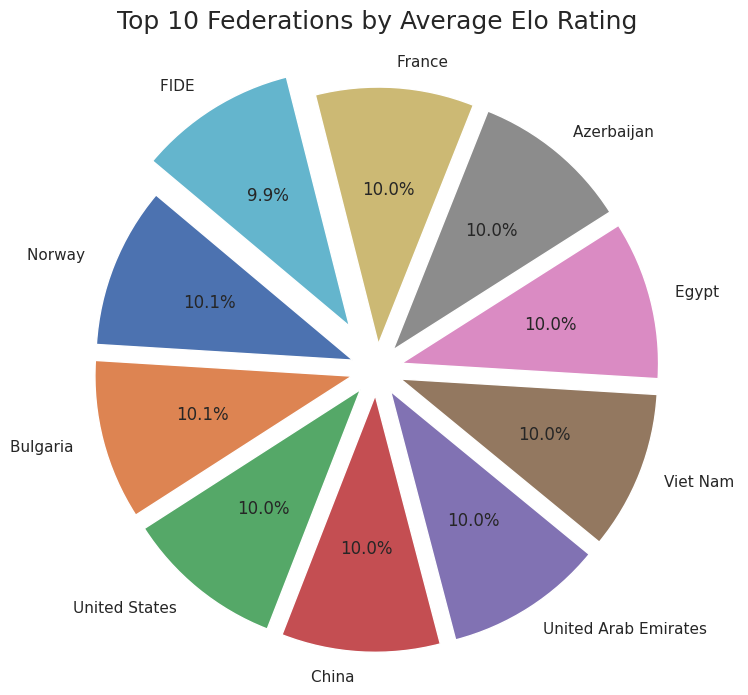

federation
Norway                   2724.666667
Bulgaria                 2706.500000
United States            2686.736842
China                    2684.333333
United Arab Emirates     2684.000000
Viet Nam                 2683.500000
Egypt                    2680.000000
Azerbaijan               2679.428571
France                   2678.857143
FIDE                     2672.833333
Name: ELO, dtype: float64


In [272]:
avg_elo_by_federation = df.groupby('federation')['ELO'].mean().nlargest(10)

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)  # You can adjust the explode values as needed

plt.figure(figsize=(8, 8))
plt.pie(avg_elo_by_federation, labels=avg_elo_by_federation.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Top 10 Federations by Average Elo Rating')
plt.axis('equal')
plt.show()
print(avg_elo_by_federation)

### Question 7: Visualize the total number of games played by players from the top 10 countries with the most players.

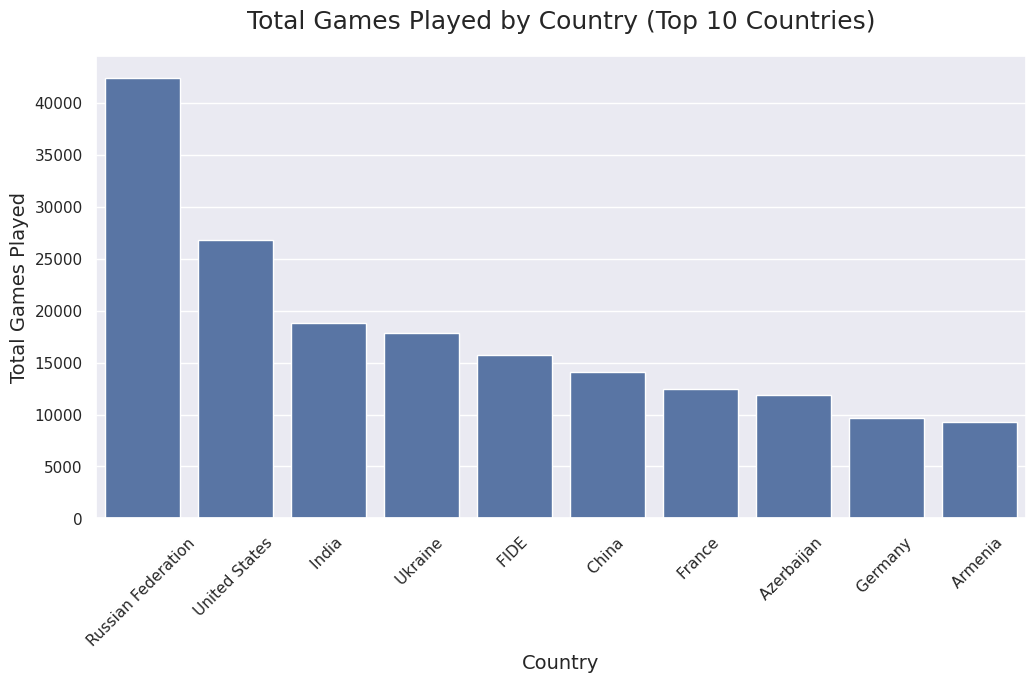

Index(['Russian Federation ', 'United States ', 'India ', 'Ukraine ', 'FIDE ',
       'China ', 'Germany ', 'Armenia ', 'France ', 'Azerbaijan '],
      dtype='object', name='federation')


In [273]:
top_10_countries = df['federation'].value_counts().nlargest(10).index
total_games_by_country = df[df['federation'].isin(top_10_countries)].groupby('federation')['games'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_games_by_country.index, y=total_games_by_country.values)
plt.xlabel('Country')
plt.ylabel('Total Games Played')
plt.title('Total Games Played by Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()
print(top_10_countries)

### Question 8: What is the average age of the players in the top 200 rankings?


Average birth year: 34.605


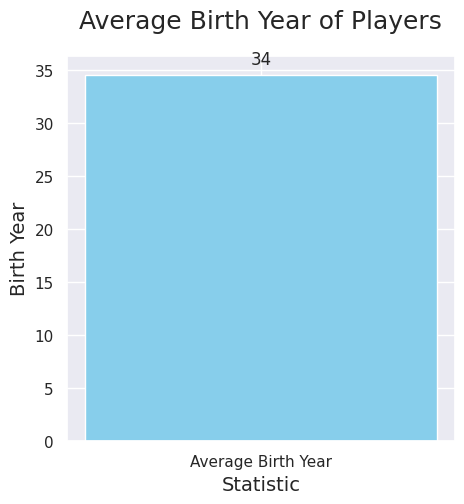

In [274]:
average_birth_year = df['age'].mean()
print("Average birth year:", average_birth_year)

plt.figure(figsize=(5,5 ))
plt.bar("Average Birth Year", average_birth_year, color='skyblue')
plt.xlabel('Statistic')
plt.ylabel('Birth Year')
plt.title('Average Birth Year of Players')
plt.text(0, average_birth_year + 1, str(int(average_birth_year)), ha='center', fontsize=12)
plt.show()

### Question 9: Visualize the distribution of Elo ratings for players from the top 10 countries with the most players.

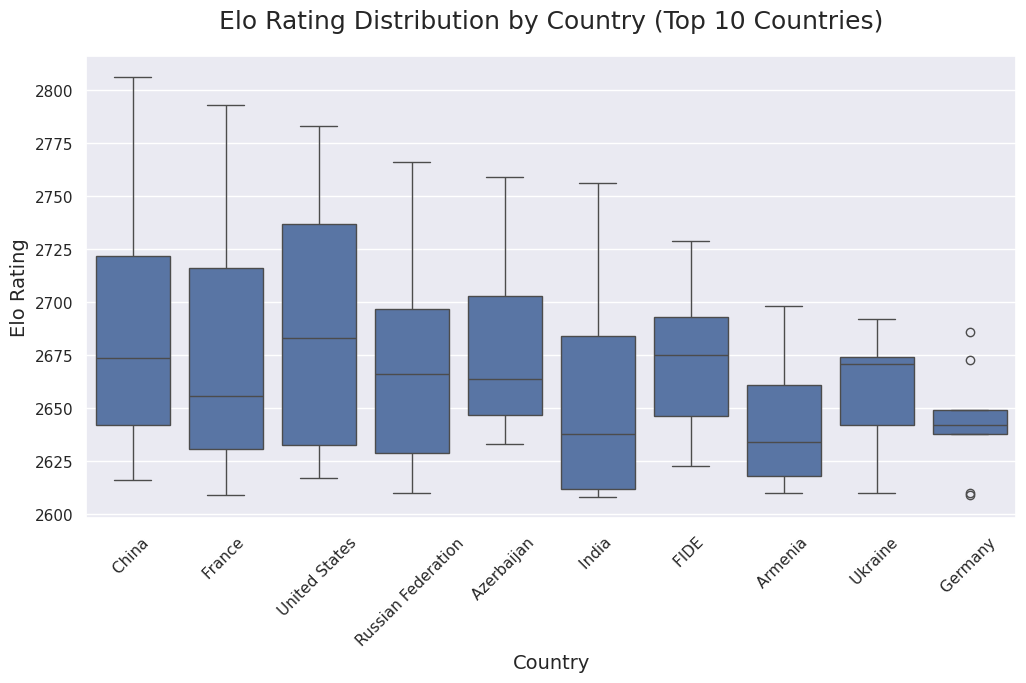

Index(['Russian Federation ', 'United States ', 'India ', 'Ukraine ', 'FIDE ',
       'China ', 'Germany ', 'Armenia ', 'France ', 'Azerbaijan '],
      dtype='object', name='federation')


In [275]:
top_10_countries = df['federation'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['federation'].isin(top_10_countries)], x='federation', y='ELO')
plt.xlabel('Country')
plt.ylabel('Elo Rating')
plt.title('Elo Rating Distribution by Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()
print(top_10_countries)

### Question 10: Visualize the frequency disrtibutions of Elo ratings

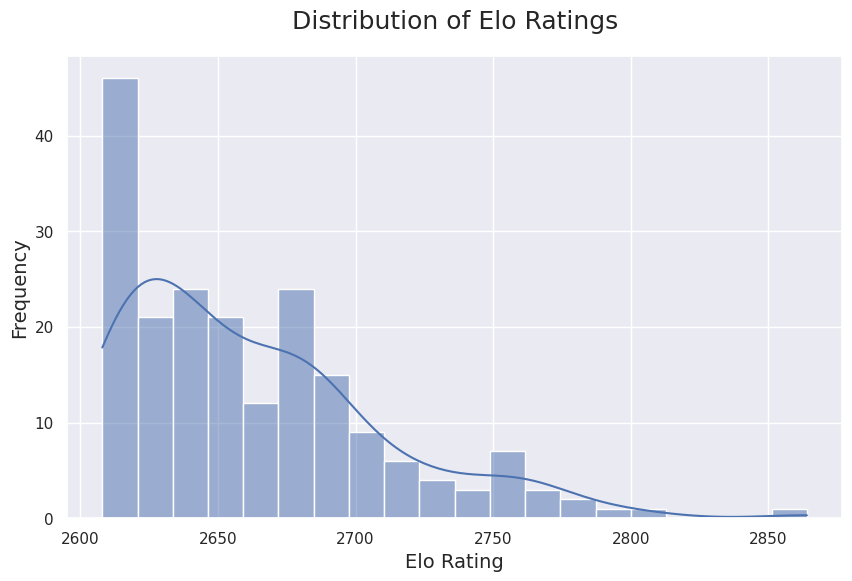

In [276]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ELO'], bins=20, kde=True)
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Elo Ratings')
plt.show()


### Question 11: Create a Barplot on TOP players by Country


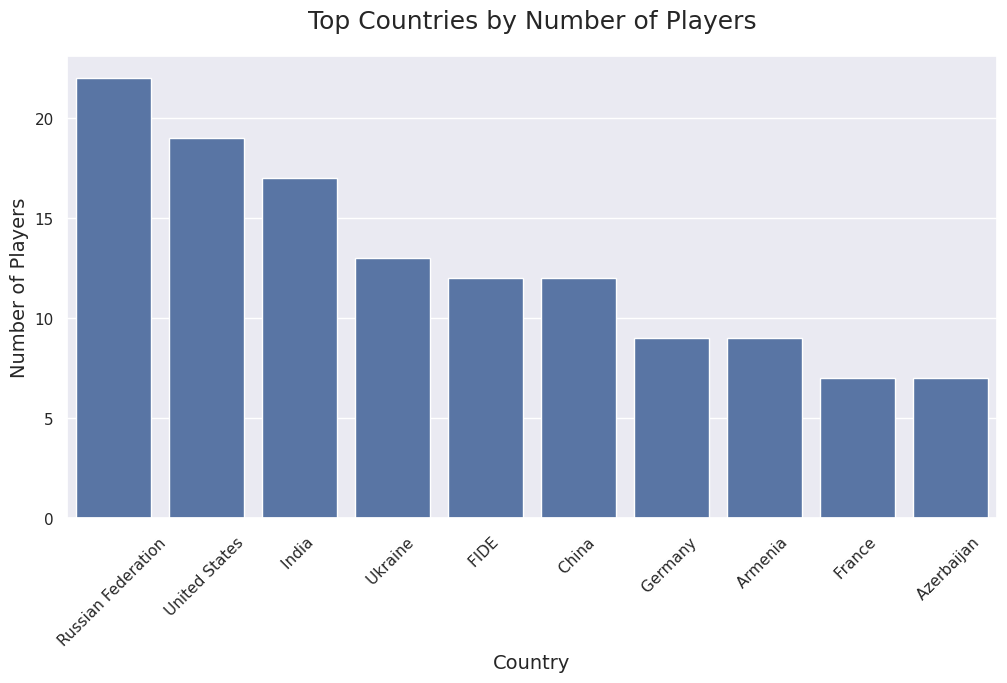

federation
Russian Federation     22
United States          19
India                  17
Ukraine                13
FIDE                   12
China                  12
Germany                 9
Armenia                 9
France                  7
Azerbaijan              7
Name: count, dtype: int64


In [277]:
top_countries = df['federation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top Countries by Number of Players')
plt.xticks(rotation=45)
plt.show()
print(top_countries)

### Question 12: What is the Elo rating of the player with the lowest number of games played?


Elo rating of the player with the lowest number of games played: 2610


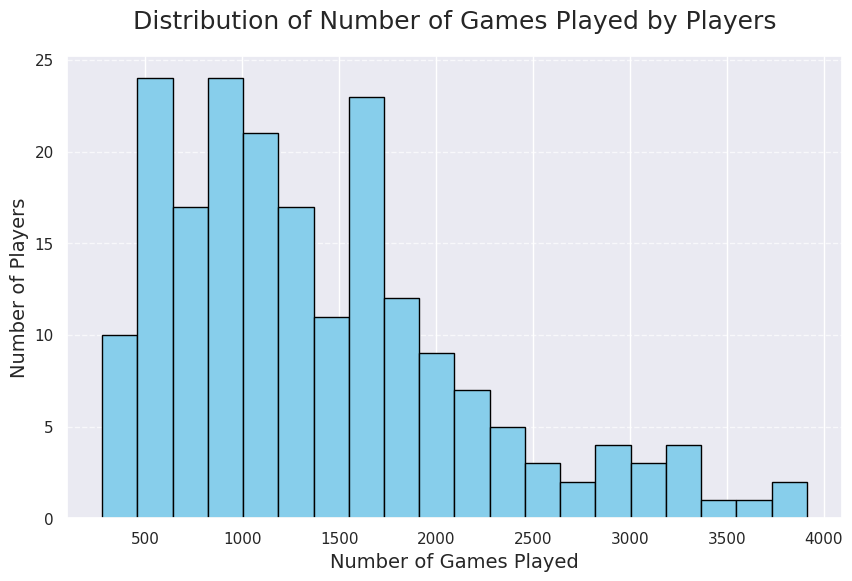

In [278]:
lowest_games_played_player = df[df['games'] == df['games'].min()]
lowest_games_played_elo = lowest_games_played_player['ELO'].values[0]
print("Elo rating of the player with the lowest number of games played:", lowest_games_played_elo)

plt.figure(figsize=(10, 6))
plt.hist(df['games'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Games Played')
plt.ylabel('Number of Players')
plt.title('Distribution of Number of Games Played by Players')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Question 13: Who are the top 5 players from China based on Elo rating?


Top 5 Chinese players based on Elo rating:
            name    ELO
1    Liren Ding   2806
18     Hao Wang   2735
21       Yi Wei   2727
26    Yangyi Yu   2720
28  Xiangzhi Bu   2709


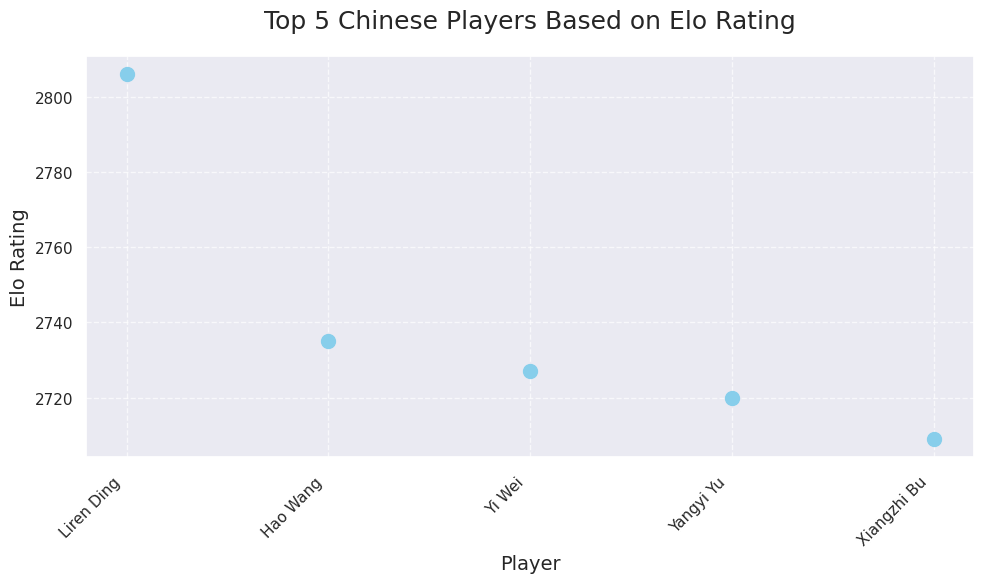

In [279]:
# Remove leading/trailing spaces from the 'federation' column
df['federation'] = df['federation'].str.strip()

# Filter and find the top 5 Chinese players based on Elo rating
top_5_chinese_players = df[df['federation'] == 'China'].nlargest(5, 'ELO')

# Print the top 5 Chinese players' names and ELO ratings
print("Top 5 Chinese players based on Elo rating:\n", top_5_chinese_players[['name ', 'ELO']])

plt.figure(figsize=(10, 6))
plt.scatter(top_5_chinese_players['name '], top_5_chinese_players['ELO'], color='skyblue', marker='o', s=100)
plt.xlabel('Player')
plt.ylabel('Elo Rating')
plt.title('Top 5 Chinese Players Based on Elo Rating')
plt.xticks(rotation=45, ha='right')  # Rotate player names for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Question 14: Create a histogram on age distribution

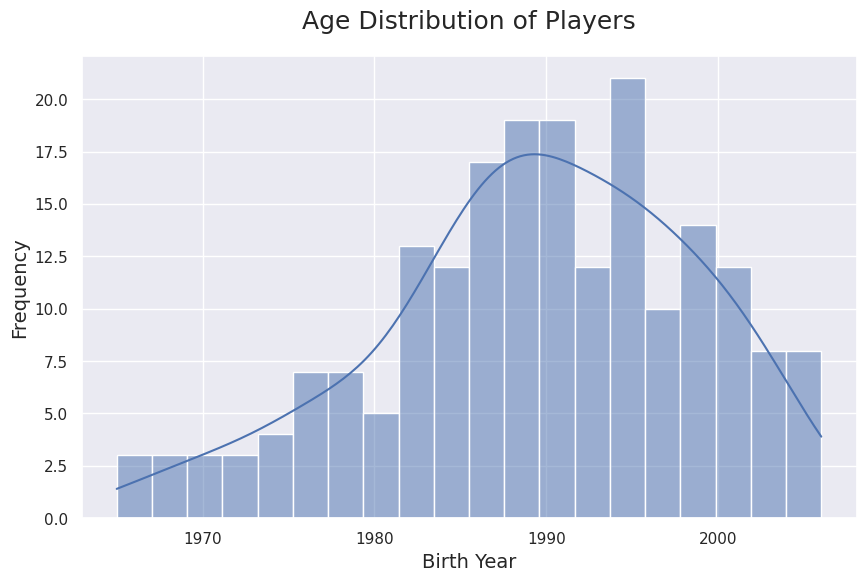

,count
age,
34,12
29,11
36,10
30,10
41,10


In [280]:
plt.figure(figsize=(10, 6))
sns.histplot(df['birth_year'], bins=20, kde=True)
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Age Distribution of Players')
plt.show()
AGE_counts = df['age'].value_counts().head()
AGE_counts


### Question 15: Create a BoxPlot on Intra-Country Elo Ratings


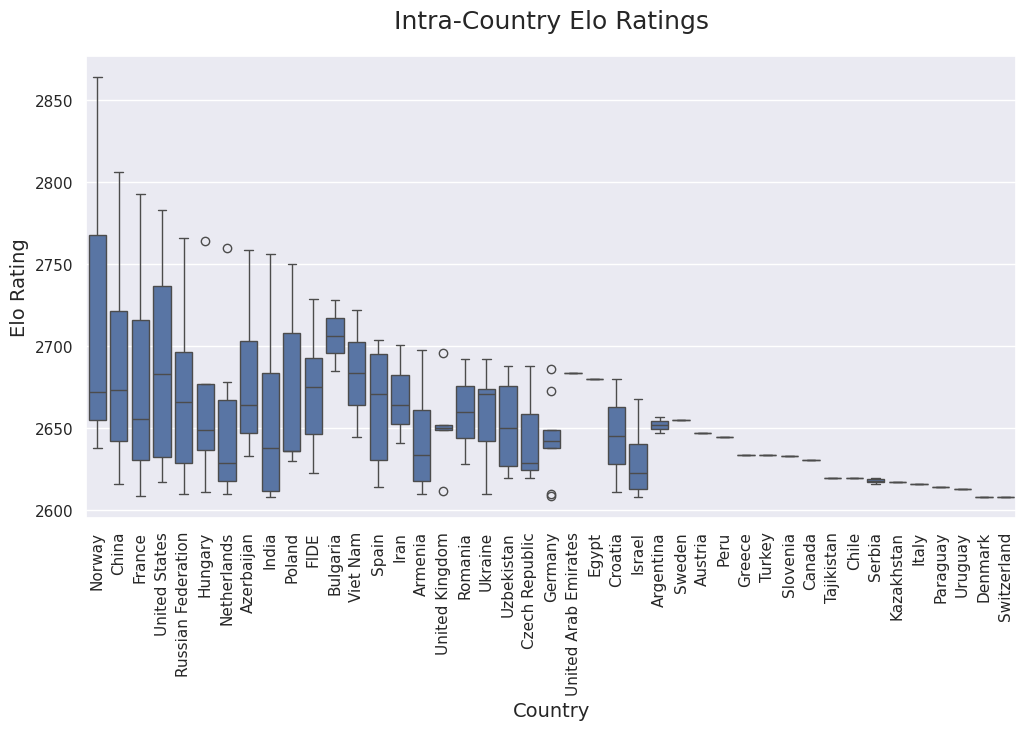

In [281]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='federation', y='ELO')
plt.xlabel('Country')
plt.ylabel('Elo Rating')
plt.title('Intra-Country Elo Ratings')
plt.xticks(rotation=90)
plt.show()

### Question 16: What is the Elo rating range of players from INDIA?


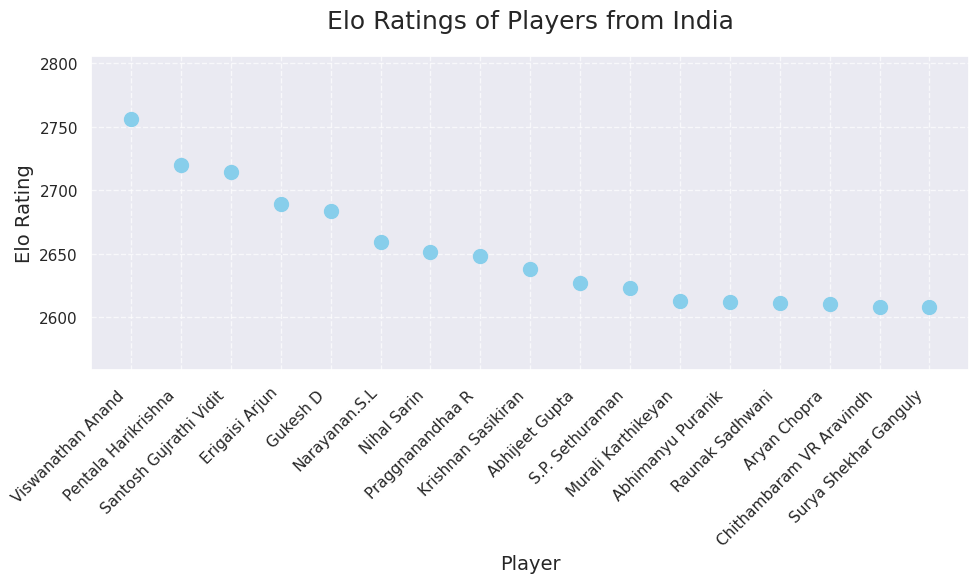

In [282]:
import matplotlib.pyplot as plt

# Filter the DataFrame to get players from India
india_players = df[df['federation'] == 'India']

# Create a scatter plot to visualize the Elo ratings of Indian players
plt.figure(figsize=(10, 6))
plt.scatter(india_players['name '], india_players['ELO'], color='skyblue', marker='o', s=100)
plt.xlabel('Player')
plt.ylabel('Elo Rating')
plt.title('Elo Ratings of Players from India')
plt.xticks(rotation=45, ha='right')  # Rotate player names for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(india_players['ELO'].min() - 50, india_players['ELO'].max() + 50)  # Set y-axis limits
plt.tight_layout()
plt.show()


### Question 17: What is the total number of games played by players from Russia?


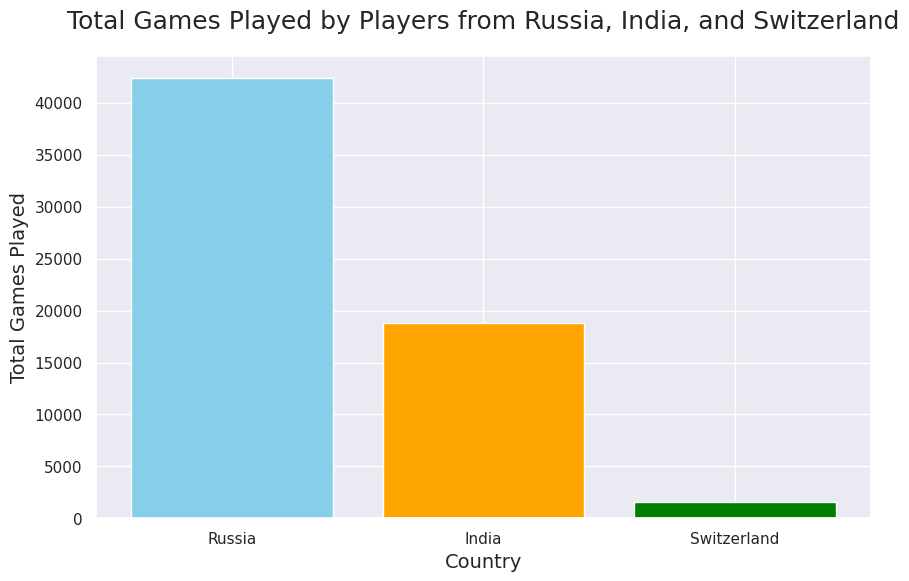

42381


In [283]:
import matplotlib.pyplot as plt

# Remove leading and trailing spaces in the 'federation' column
df['federation'] = df['federation'].str.strip()

# Filter the DataFrame to get players from Russia, India, and Switzerland
russia_players = df[df['federation'] == 'Russian Federation']
india_players = df[df['federation'] == 'India']
switzerland_players = df[df['federation'] == 'Switzerland']

# Calculate total games played by players from Russia, India, and Switzerland
total_games_russia = russia_players['games'].sum()
total_games_india = india_players['games'].sum()
total_games_switzerland = switzerland_players['games'].sum()

# Plot the comparison
plt.figure(figsize=(10, 6))
countries = ['Russia', 'India', 'Switzerland']
total_games = [total_games_russia, total_games_india, total_games_switzerland]
plt.bar(countries, total_games, color=['skyblue', 'orange', 'green'])
plt.xlabel('Country')
plt.ylabel('Total Games Played')
plt.title('Total Games Played by Players from Russia, India, and Switzerland')
plt.show()
print(total_games_russia)

### Question 18: Create a pie chart to visualize the distribution of players by federation/country.


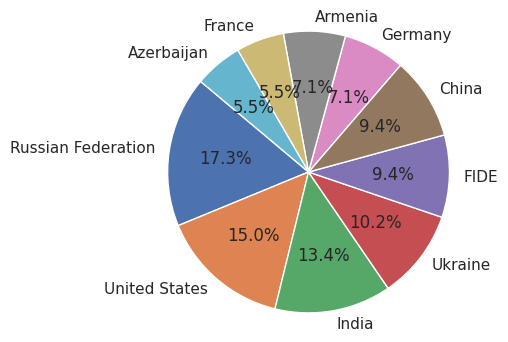

federation
Russian Federation    22
United States         19
India                 17
Ukraine               13
FIDE                  12
China                 12
Germany                9
Armenia                9
France                 7
Azerbaijan             7
Name: count, dtype: int64


In [284]:
federation_counts = df['federation'].value_counts().head(10)  # Display top 10 federations

plt.figure(figsize=(4, 4))

plt.pie(federation_counts, labels=federation_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()
print(federation_counts)

### Question 19: Create a scatter plot to explore the relationship between Elo ratings and the number of games played.


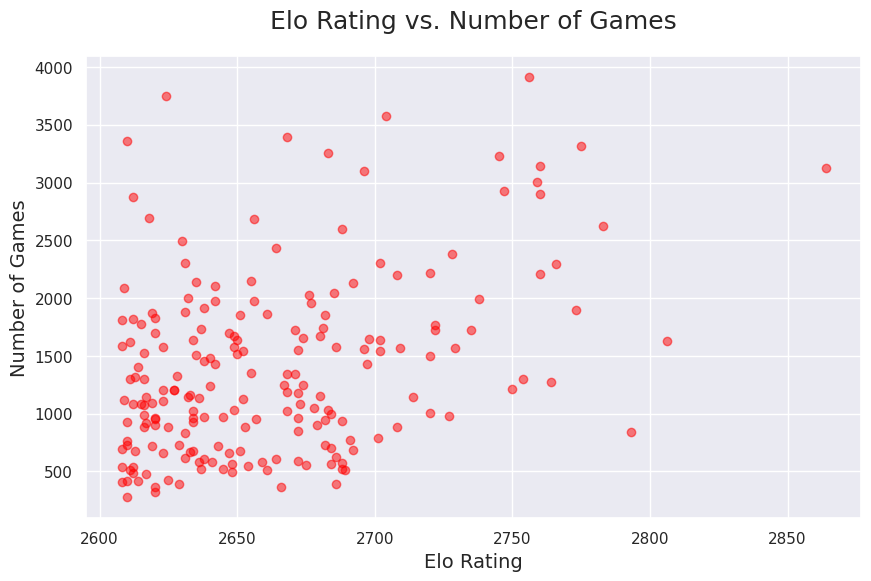

,count
ELO,
2620,7
2610,6
2608,5
2616,5
2634,5
2672,5
2612,5
2631,4
2668,4


In [285]:
elo_counts = df['ELO'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.scatter(df['ELO'], df['games'], alpha=0.5, color='red')
plt.xlabel('Elo Rating')
plt.ylabel('Number of Games')
plt.title('Elo Rating vs. Number of Games')
plt.show()
elo_counts


### Question 20: Plot a histogram of player ages to visualize the age distribution.

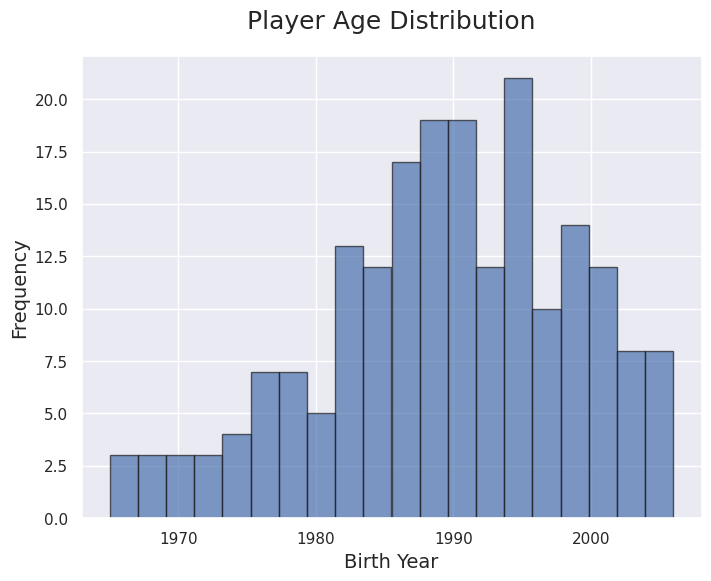

In [286]:
plt.figure(figsize=(8, 6))
plt.hist(df['birth_year'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Player Age Distribution')
plt.show()


### Question 21: Create a scatter plot matrix to visualize relationships between Elo ratings, birth years, and the number of games played.

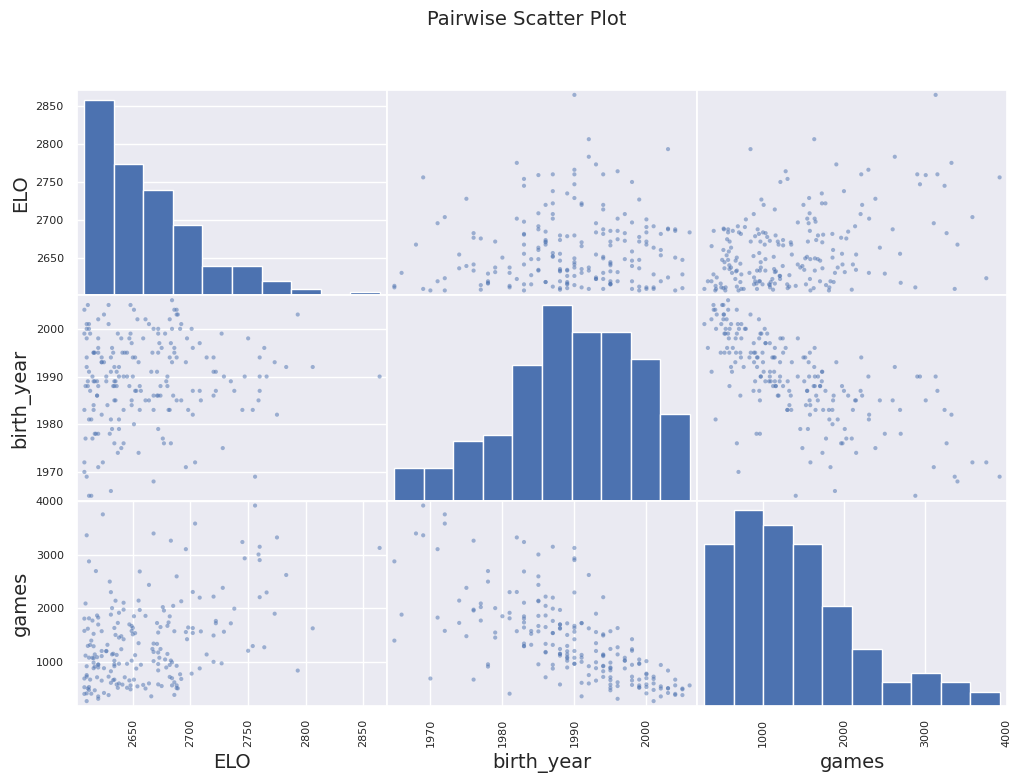

In [287]:
from pandas.plotting import scatter_matrix

scatter_attributes = ['ELO', 'birth_year', 'games']
scatter_matrix(df[scatter_attributes], figsize=(12, 8), alpha=0.5)
plt.suptitle('Pairwise Scatter Plot', fontsize=14)
plt.show()


### Question 22: Create a correlation heat map

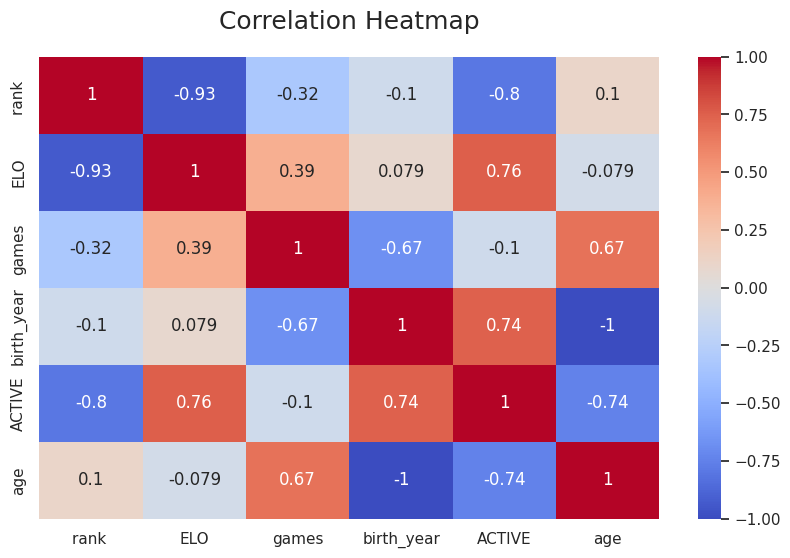

In [288]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [289]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


               rank        ELO     games  birth_year    ACTIVE       age
rank        1.000000 -0.933138 -0.320626   -0.104458 -0.799584  0.104458
ELO        -0.933138  1.000000  0.390230    0.078851  0.756747 -0.078851
games      -0.320626  0.390230  1.000000   -0.674625 -0.104442  0.674625
birth_year -0.104458  0.078851 -0.674625    1.000000  0.742355 -1.000000
ACTIVE     -0.799584  0.756747 -0.104442    0.742355  1.000000 -0.742355
age         0.104458 -0.078851  0.674625   -1.000000 -0.742355  1.000000
